In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

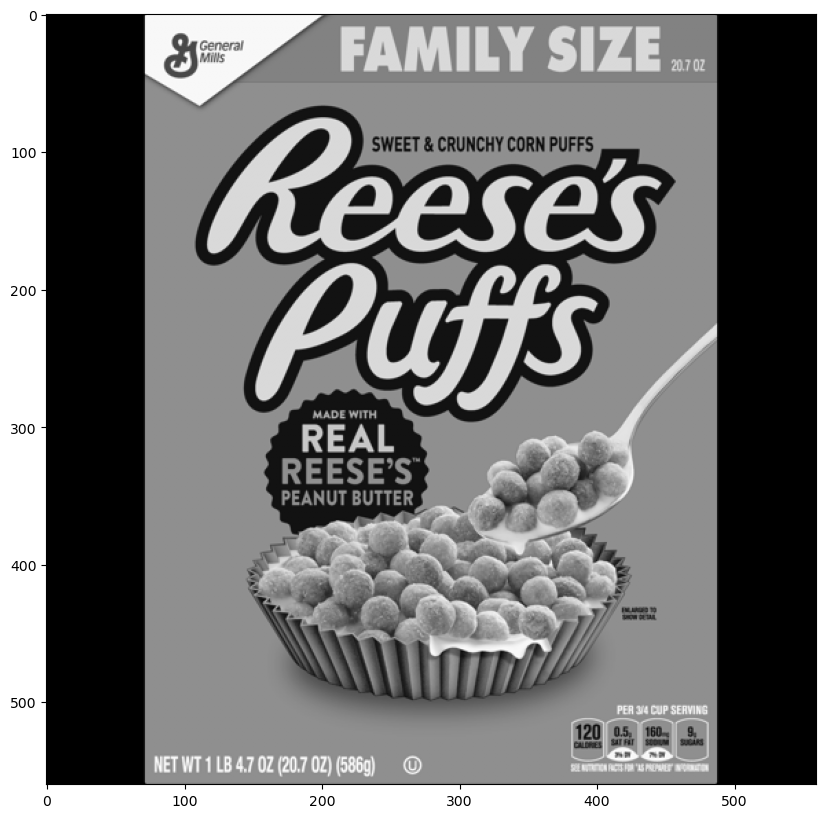

In [3]:
reeses = cv2.imread('reeses_puffs.png',0)
display(reeses)
plt.show()

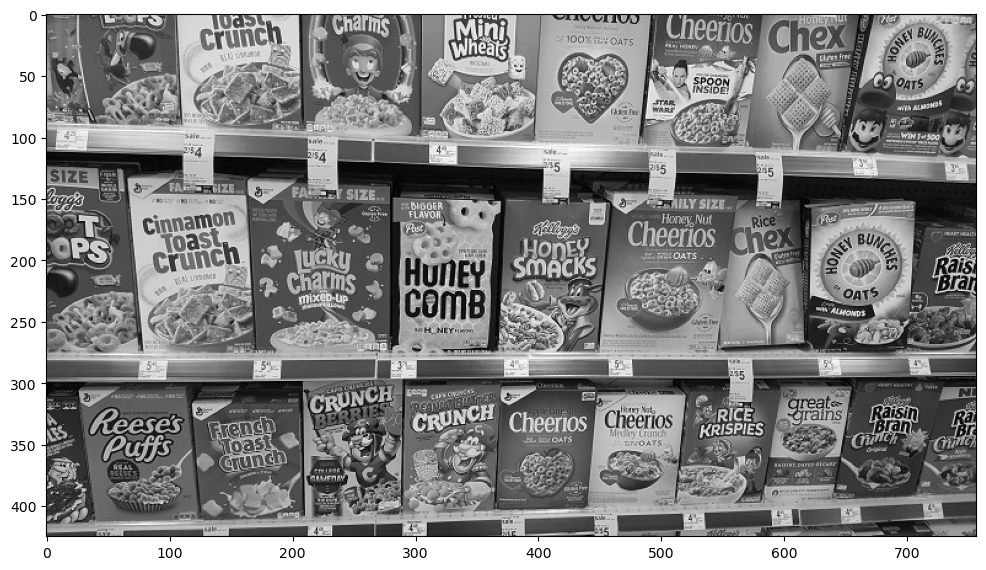

In [4]:
ceral = cv2.imread('many_cereals.jpg',0)
display(ceral)
plt.show()

# BRUTE FORCE - ORB Detectors

In [5]:
orb = cv2.ORB_create()

In [6]:
keyPoints1, descriptors1 =orb.detectAndCompute(reeses, None)
keyPoints2, descriptors2 = orb.detectAndCompute(ceral,None)

In [7]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [8]:
matches = bf.match(descriptors1, descriptors2)

In [9]:
matches = sorted(matches, key = lambda x:x.distance)

In [10]:
matches

[< cv2.DMatch 000001AEE6449150>,
 < cv2.DMatch 000001AEE6449070>,
 < cv2.DMatch 000001AEE6448F90>,
 < cv2.DMatch 000001AEE6449210>,
 < cv2.DMatch 000001AEE6449670>,
 < cv2.DMatch 000001AEE6449850>,
 < cv2.DMatch 000001AEE6449610>,
 < cv2.DMatch 000001AEE6449310>,
 < cv2.DMatch 000001AEE6449330>,
 < cv2.DMatch 000001AEE64490B0>,
 < cv2.DMatch 000001AEE6449590>,
 < cv2.DMatch 000001AEE64496D0>,
 < cv2.DMatch 000001AEE6448790>,
 < cv2.DMatch 000001AEE6448FB0>,
 < cv2.DMatch 000001AEE6448FD0>,
 < cv2.DMatch 000001AEE64490F0>,
 < cv2.DMatch 000001AEE6449410>,
 < cv2.DMatch 000001AEE6448DB0>,
 < cv2.DMatch 000001AEE6448590>,
 < cv2.DMatch 000001AEE6449370>,
 < cv2.DMatch 000001AEE4ED7830>,
 < cv2.DMatch 000001AEE64495F0>,
 < cv2.DMatch 000001AEE6449650>,
 < cv2.DMatch 000001AEE64497F0>,
 < cv2.DMatch 000001AEE6449970>,
 < cv2.DMatch 000001AEE6448090>,
 < cv2.DMatch 000001AEE64491F0>,
 < cv2.DMatch 000001AEE6449230>,
 < cv2.DMatch 000001AEE64493D0>,
 < cv2.DMatch 000001AEE6448C10>,
 < cv2.DMa

In [11]:
reeses_matches = cv2.drawMatches(reeses, keyPoints1,ceral, keyPoints2,matches[:25],None,flags= 2)

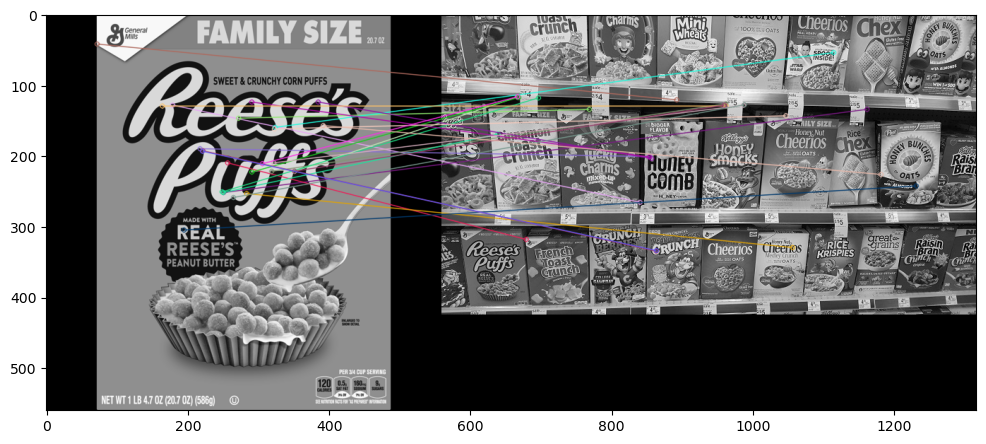

In [12]:
display(reeses_matches)
plt.show()

# BRUTE FORCE - SCALE INVARIANT FEATURE TRANSFORM(SIFT)

In [28]:
sift = cv2.xfeatures2d.SIFT_create()

In [29]:
keyPoint1, descriptors1 = sift.detectAndCompute(reeses, None)
keyPoint2, descriptors2 = sift.detectAndCompute(ceral, None)

In [30]:
bf = cv2.BFMatcher()

In [31]:
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

In [32]:
good = []

# RATIO TEST, Less Distance = Better Match
for match1, match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [33]:
len(good), len(matches)

(79, 1501)

In [34]:
sift_matches = cv2.drawMatchesKnn(reeses, keyPoints1, ceral, keyPoints2, good, None, flags=2)

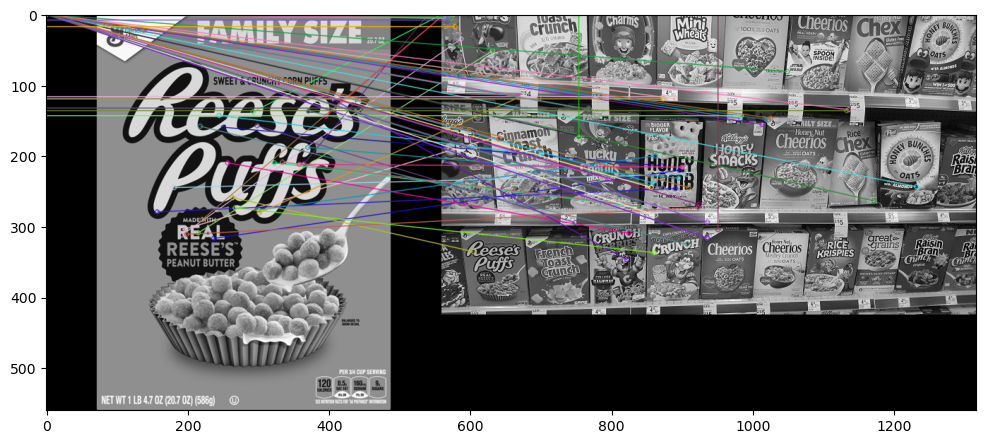

In [35]:
display(sift_matches)
plt.show()

## FLANN BASED MATCHER

In [36]:
sift = cv2.xfeatures2d.SIFT_create()

In [37]:
keyPoints1, descriptors1 = sift.detectAndCompute(reeses,None)
keyPoints2, descriptors2 = sift.detectAndCompute(ceral, None)

# Flann -> Fast Library for Approximate Nearest Neighbours.
* It is not going to find best possible matches, instead, it finds general good matches

In [45]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm= FLANN_INDEX_KDTREE, trees= 5)
search_params = dict(checks=50)

In [46]:
flann = cv2.FlannBasedMatcher(index_params, search_params)


In [47]:
matches = flann.knnMatch(descriptors1, descriptors2, k=2)

In [48]:
matchesMask = [[0,0] for i in range(len(matches))]

In [49]:
#good = []
for i,(match1, match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        #good.append([match1])
        matchesMask[i] = [1,0]

In [50]:
draw_params = dict(matchColor=(0,255,0),
                       singlePointColor = (255,0,0),
                   matchesMask = matchesMask, flags = 0)

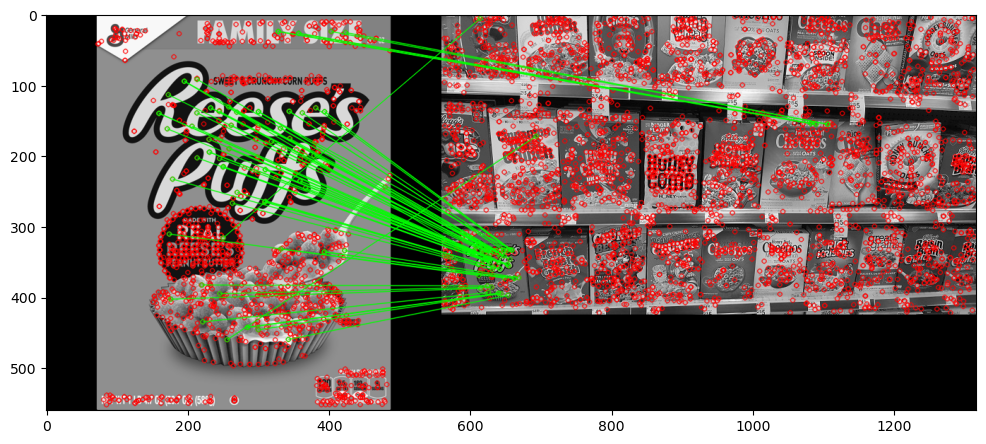

In [53]:
flann_matches = cv2.drawMatchesKnn(reeses, keyPoints1, ceral, keyPoints2, matches, None,**draw_params)
display(flann_matches)
plt.show()